# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

<IPython.core.display.Javascript object>


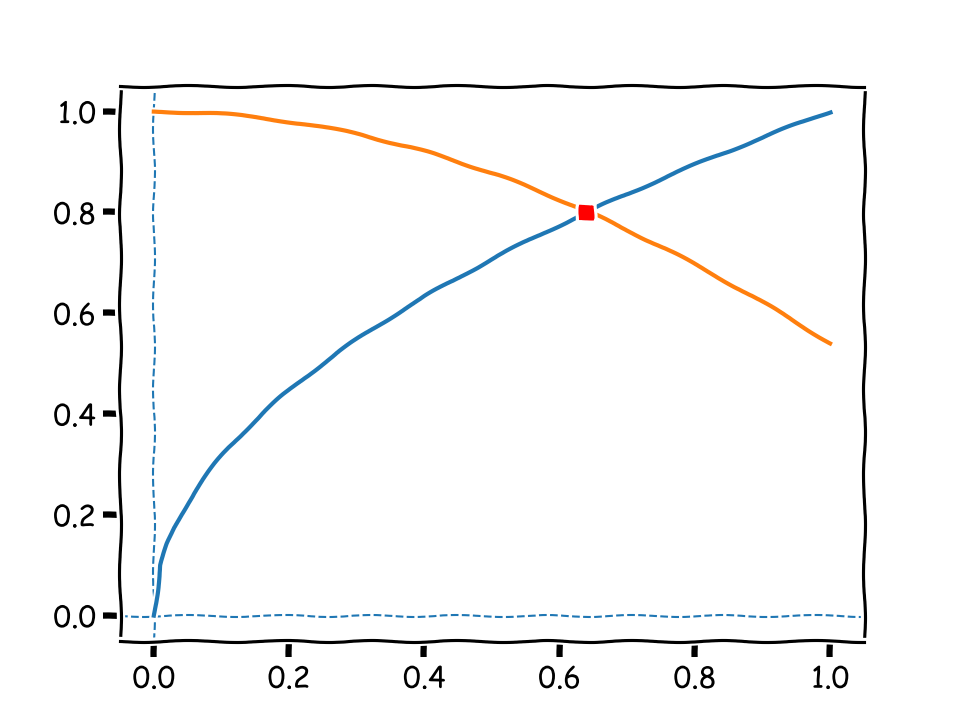

In [1]:
import numpy as np
import math
%matplotlib notebook  

import matplotlib.pyplot as plt
plt.xkcd()
def sqrt(x):
    return np.sqrt(x)
def cos(x):
    return np.cos(x)
# localizing the root graphically: x ~ 0.6
x = np.linspace(0,1,100)
fig, ax = plt.subplots()  # ax - оси координат и вся область, на котором рисую
ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)  # vertical, gorizontal lines, line style, line width
ax.plot(x, sqrt(x))
ax.plot(x, cos(x))
plt.plot([0.64],[0.8],'s-', c='red', lw = 8)  # примерно отметил пересечение красной точкой


Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

In [2]:
from numpy import abs
def f(x):
    return sqrt(x)-cos(x)

def find_root(f, x0, a = 1, e = 0.001):
    '''given f(x), x0, param a and precision returns estimated root and number of iterations made'''
    iter_num = 0
    x = x0  
    while iter_num < 100: # ralatively large number of possible iterations
        x_prev = x
        x = x - a * f(x)
        iter_num += 1
        if abs(x - x_prev) < e:
            return x, iter_num
    
print(find_root(f, 0.6))
    

(0.6416141219929243, 4)


[14. 11.  9.  7.  6.  5.  5.  4.  3.  3.  2.  3.  4.  5.  6.  7.  9. 11.
 16. 25.]


<IPython.core.display.Javascript object>


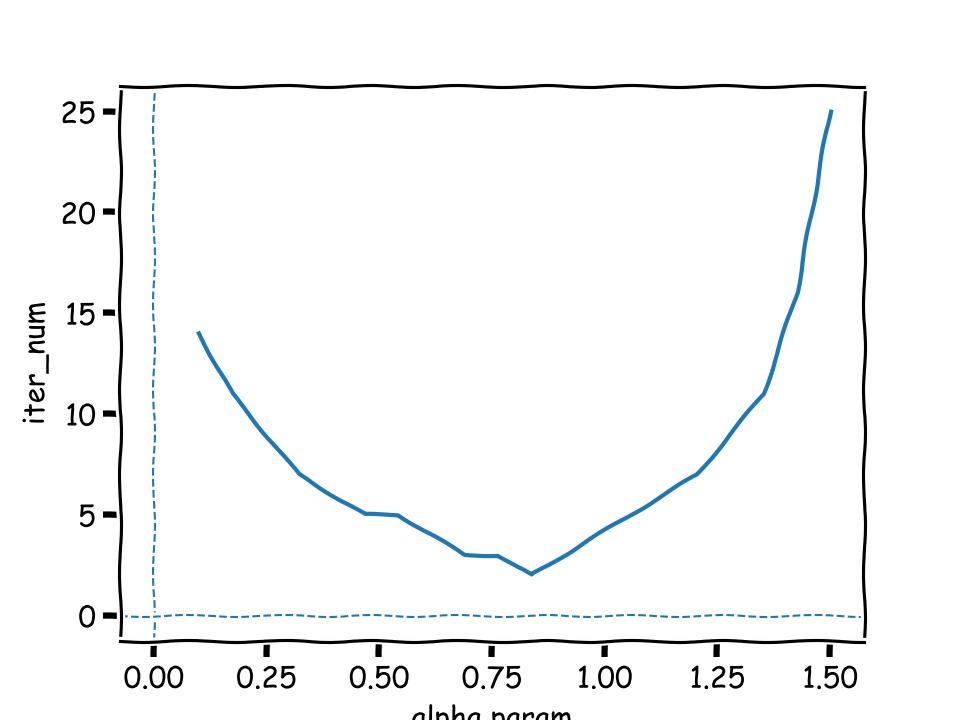

Text(0, 0.5, 'iter_num')

In [3]:
#  iterations on alpha dependency given e = 0.001


params = np.linspace(0.1, 1.5, 20)
l = params.shape[0]
iters = np.zeros((l, ))
for i in range(l):
    x, iter_num = find_root(f, 0.6, params[i])
    iters[i] = iter_num
print(iters)
fig, ax = plt.subplots()  # ax - оси координат и вся область, на котором рисую
ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)  # vertical, gorizontal lines, line style, line width
ax.plot(params, iters)
plt.xlabel('alpha param')
plt.ylabel('iter_num')


[ 1.  1.  2.  2.  3.  3.  2.  2.  2.  2.  2.  2.  2.  3.  3.  4.  5.  6.
  8. 13.]


<IPython.core.display.Javascript object>


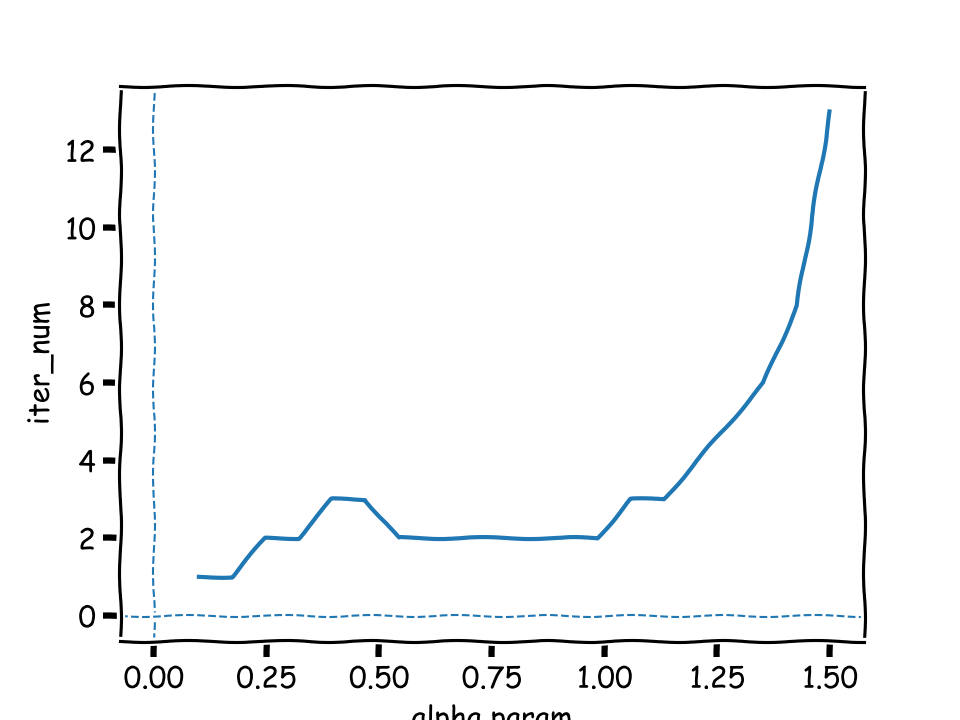

Text(0, 0.5, 'iter_num')

In [4]:
#  iterations on alpha dependency given e = 0.01

params = np.linspace(0.1, 1.5, 20)
l = params.shape[0]
iters = np.zeros((l, ))
for i in range(l):
    x, iter_num = find_root(f, 0.6, params[i], 0.01)
    iters[i] = iter_num
print(iters)
fig, ax = plt.subplots()  # ax - оси координат и вся область, на котором рисую
ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)  # vertical, gorizontal lines, line style, line width
ax.plot(params, iters)
plt.xlabel('alpha param')
plt.ylabel('iter_num')


[32. 20. 15. 12. 10.  8.  7.  6.  5.  4.  3.  4.  5.  7.  8. 10. 13. 17.
 24. 38.]


<IPython.core.display.Javascript object>


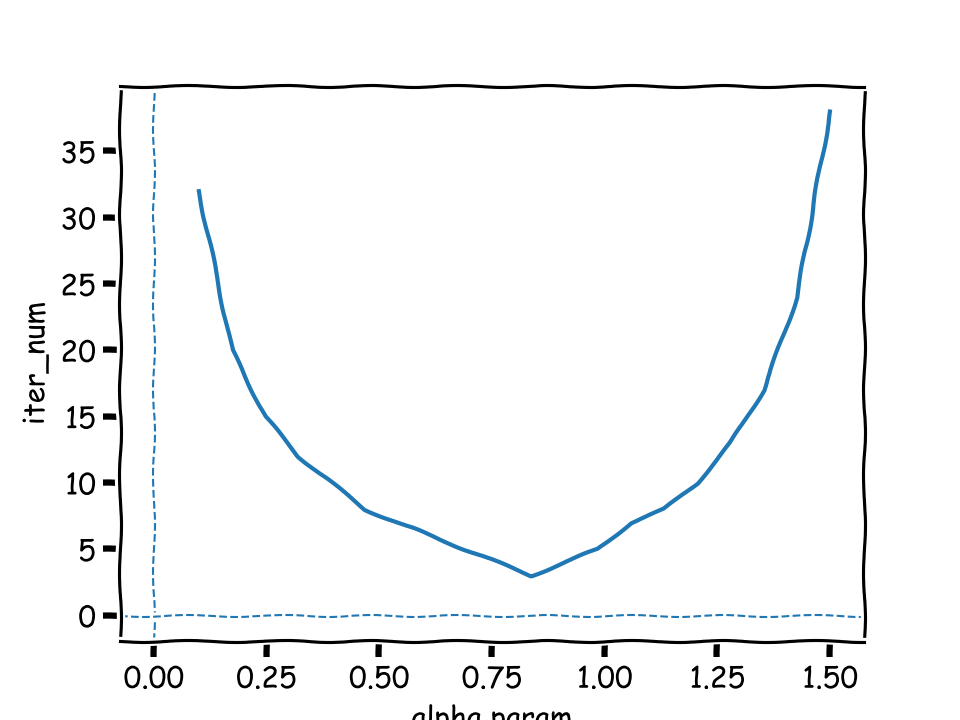

Text(0, 0.5, 'iter_num')

In [5]:
#  iterations on alpha dependency given e = 0.0001

params = np.linspace(0.1, 1.5, 20)
l = params.shape[0]
iters = np.zeros((l, ))
for i in range(l):
    x, iter_num = find_root(f, 0.6, params[i], 0.0001)
    iters[i] = iter_num
print(iters)
fig, ax = plt.subplots()  # ax - оси координат и вся область, на котором рисую
ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)  # vertical, gorizontal lines, line style, line width
ax.plot(params, iters)
plt.xlabel('alpha param')
plt.ylabel('iter_num')

In [6]:
# We can see that optimal alpha is approximately 0.8 for initially given e = 0.001
# for less accuracy (e.g. e = 0.01) optimal alfa becomes an interval from 0.5 to 1
# for more precise computations (e.g. e= 0.0001 alfa also ~0.8)

# precise alfa (computed by formula) is 0.82 which matches the point on dependency graph
def der_f(*x):
    return 1/(2 * sqrt(x)) + np.sin(x)
x_der = np.linspace(0.55, 0.7, 20)
der_values = der_f(*x_der)
m = min(der_values)
M = max(der_values)
alfa_precise= 2 / (m + M)
print(alfa_precise) 

0.8201026570451297


# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

In [24]:
def inv_quad_interpolation(func, point_0, point_1, point_2, eps):
    iter_num = 0
    while iter_num < 100 and abs(point_1 - point_0) > eps: 
        func_0 = func(point_0)
        func_1 = func(point_1)
        func_2 = func(point_2)
        x_next = (point_0 * func_1 * func_2) / ((func_0 - func_1) * (func_0 - func_2)) + (point_1 * func_0 * func_2) / ((func_1 - func_0) * (func_1 - func_2)) + (point_2 * func_1 * func_0) / ((func_2 - func_0) * (func_2 - func_1))
        point_0 = x_next
        point_1 = point_0
        point_2 = point_1
        iter_num += 1
    return point_0, iter_num
        

def func(x):
    return x - (np.cos(x) / np.sin(x))


print(inv_quad_interpolation(func, 0.6, 0.8, 1, 0.001))

# root = 0.8602782702895326, iter_num = 1

(0.8602782702895326, 1)


Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

In [ ]:
# ... ENTER YOUR CODE HERE ...

Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).